In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Arial']

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE
import statsmodels.api as sm

In [2]:
data = pd.read_csv('/Users/csuen/Documents/GitHub/ozone-radical/Main Analysis/extended indicators/I6 OH_HO2.csv')

In [3]:
data = data[data['region']!="SGP"]
data = data[data['region']!="VAN"]

In [4]:
data

,region,beta_adj,beta_adj_ste,no__co_ch4_hcho,no__co_ch4_hcho_ste,ln_beta_adj,ln_no__co_ch4_hcho
0,AUS,0.091431,0.003713,0.163286,0.017404,-2.392168,-1.812253
1,BRA,0.019462,0.000609,0.020755,0.000951,-3.939302,-3.874987
2,BTH,3.400739,0.175377,3.602547,0.168742,1.223993,1.281641
3,CA,0.372736,0.022368,1.229007,0.130772,-0.986886,0.206207
4,CCE,0.195180,0.010299,0.907695,0.063991,-1.633832,-0.096847
5,COD,0.020571,0.000981,0.026961,0.002451,-3.883866,-3.613355
6,DEU,0.371617,0.010364,0.798122,0.103655,-0.989891,-0.225494
7,FIN,0.056907,0.002216,0.146517,0.025166,-2.866331,-1.920616
8,FRA,0.153248,0.002846,0.294042,0.021190,-1.875696,-1.224033
9,GBA,0.361639,0.025487,1.295240,0.157965,-1.017109,0.258696


In [5]:
data_sens = pd.read_csv('Fig. 3b SnSv sensitivities scatter plot.csv')

In [ ]:
mod = LinearRegression()
X = data[['ln_beta_adj']]
y = data['ln_no__co_ch4_hcho']
mod.fit(X,y)
y_pred = mod.predict(X)
data['ln_no__co_ch4_hcho_adj'] = y_pred

In [20]:
mod = LinearRegression()
X = data[['ln_beta_adj']]
y = data['ln_no__co_ch4_hcho_adj']
mod.fit(X,y)
print(mod.coef_)
print(mod.intercept_)
y_pred = mod.predict(X)
print(r2_score(y_pred, y))
print(np.sqrt(MSE(y_pred, y)))

[1.09832909]
1.0026805170620277
0.912934040717504
0.3636795868172618


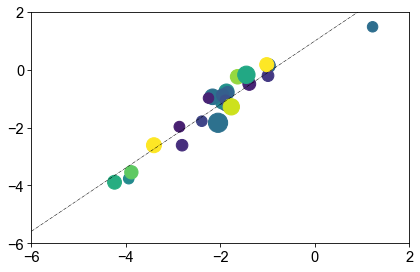

In [ ]:
fig, ax = plt.subplots(figsize=(6.5, 4), dpi=75)
X = data['ln_beta_adj']
y = data['ln_no__co_ch4_hcho_adj']
size = data_sens['o3_ppb']
o3net = data_sens['o3net_mole']

x_set = np.arange(-6,4,0.1)
y_set = x_set*mod.coef_+mod.intercept_
plt.plot(x_set, y_set, linestyle='-.', linewidth=0.5, color="black")

plt.scatter(X, y, s=size**1.5, vmin=0, vmax=1.5, c=o3net, cmap="viridis")

#plt.colorbar()
plt.xlim([-6,2])
plt.ylim([-6,2])
plt.yticks([-6,-4,-2,0,2], fontsize=14)
plt.xticks([-6,-4,-2,0,2], fontsize=14)

plt.savefig("Fig. 4f d_OH_HO2.pdf", format="pdf", bbox_inches="tight")